In [1]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
# Importing the dataset
data = pd.read_csv('xclara.csv')
print(data.shape)
data.head()

(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


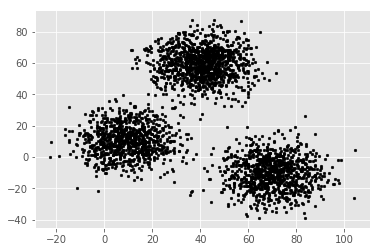

In [2]:
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

In [3]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [4]:
# Number of clusters
k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[78.  3.]
 [ 7. 10.]
 [36. 67.]]


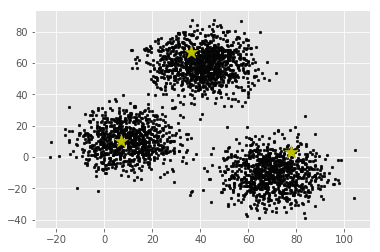

In [5]:
plt.scatter(f1, f2, c='#050505', s=7)

plt.scatter(C_x, C_y, marker='*', s=200, c='y')

In [18]:
def kmeans_(k,X):
    
    C_x = np.random.randint(0, np.max(X)-20, size=k)
    # Y coordinates of random centroids
    C_y = np.random.randint(0, np.max(X)-20, size=k)
    C = np.array(list(zip(C_x, C_y)), dtype=np.float32)


    # To store the value of centroids when it updates
    C_old = np.zeros(C.shape)
    # Cluster Lables(0, 1, 2)
    clusters = np.zeros(len(X))

    error = dist(C, C_old, None)
    # Loop will run till the error becomes zero
    while error != 0:
        # Assigning each value to its closest cluster
        for i in range(len(X)):
            distances = dist(X[i], C)
            cluster = np.argmin(distances)
            clusters[i] = cluster

        # Storing the old centroid values
        C_old = deepcopy(C)

        # Finding the new centroids by taking the average value
        for i in range(k):
            points = [X[j] for j in range(len(X)) if clusters[j] == i]
            C[i] = np.mean(points, axis=0)

        error = dist(C, C_old, None)
        
    return(error)


In [ ]:
e = []

for i in range(1,15):
    e.append(kmeans_(i,X))



c:\users\vaqai\appdata\local\programs\python\python36-32\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\users\vaqai\appdata\local\programs\python\python36-32\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
e[2]

In [15]:
from sklearn.cluster import KMeans


for i in range(1,15):
    # Number of clusters
    kmeans = KMeans(n_clusters=7)
    # Fitting the input data
    kmeans = kmeans.fit(X)
    # Getting the cluster labels
    labels = kmeans.predict(X)
    # Centroid values
    centroids = kmeans.cluster_centers_

In [16]:
kmeans.

array([[-0.55644073,  7.44166945,  5.28730092],
       [ 4.1929805 , -2.22408608, -3.28007628],
       [-7.99644669, -4.75322927, -4.42078139],
       [ 6.41829063, -9.10911111,  7.14747065],
       [ 4.23151193,  5.56049466,  8.32014289],
       [-7.21568069, -6.16736764,  4.55510752],
       [-8.00329986, -6.8459423 , -9.29203456]])

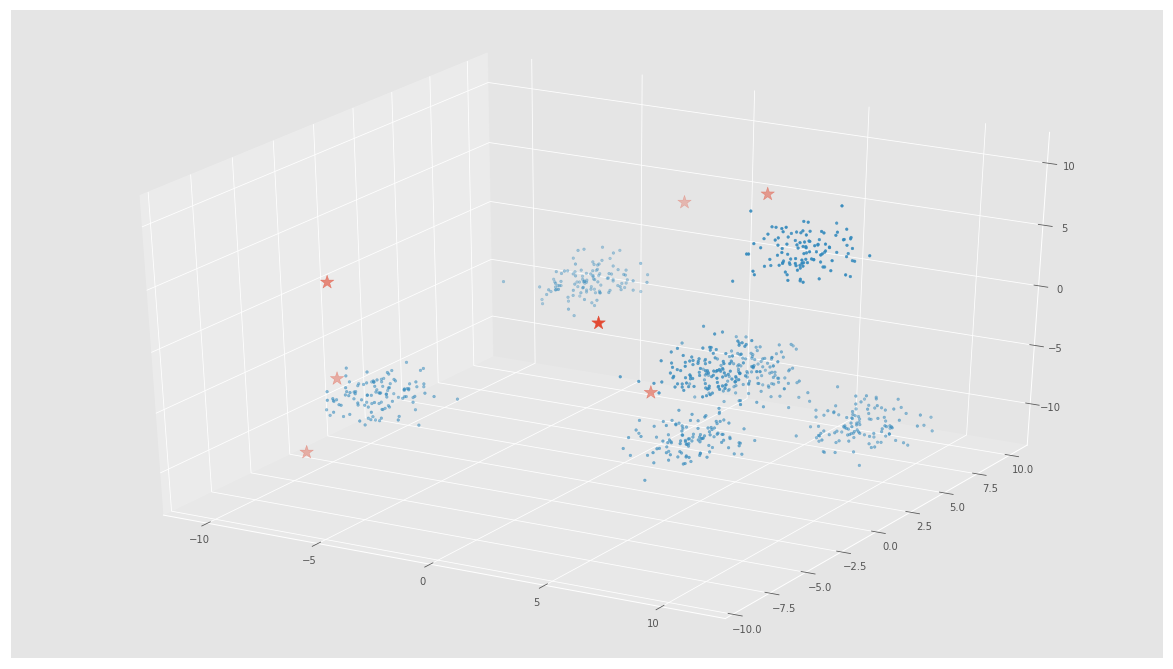

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (16, 9)

# Creating a sample dataset with 4 clusters
X, y = make_blobs(n_samples=800, n_features=3, centers=7)
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2],marker="*",s=200)
ax.scatter(X[:, 0], X[:, 1], X[:, 2],s=7)